# NYC 311 calls Data Analysis

NYC 311 is a service that provides access to non-emergency City services and info about City government programs to the residents of New York.  Each year, the service receives millions of requests reporting various kinds of problems with city services and other issues.

The data on the type of calls received, and their ultimate resolution is made available through the NYC Open Data portal at https://data.cityofnewyork.us/Social-Services/311-Service-Requests-from-2010-to-Present/erm2-nwe9. The data is updated daily.  


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Exploring the data

In [2]:
NYC_311 = pd.read_pickle(r"C:\Users\deepak\OneDrive\Desktop\Academics\Business Analytics\Project-3_NYC_311_Calls.pkl")

In [3]:
NYC_311 = NYC_311.set_index(pd.DatetimeIndex(NYC_311['Created Date']))
del NYC_311['Created Date']


#### What is the average number of daily complaints received in 2022?

In [4]:
df_2022 = NYC_311.loc['2022']

In [5]:
df_2022.resample("D").size().mean()

8684.320547945206

#### On which single date were the maximum number of calls received?

In [6]:
single_date = NYC_311.resample('D').size()

In [14]:
single_date.idxmax()

Timestamp('2020-08-04 00:00:00', freq='D')

#### On the date the maximum number of calls were received, what was the most important complaint type?

In [16]:
important_complaint = NYC_311.loc['2020-08-04']

In [19]:
important_complaint['Complaint Type'].value_counts()

Damaged Tree                           14863
Noise - Residential                      982
Request Large Bulky Item Collection      909
Street Light Condition                   617
Overgrown Tree/Branches                  609
                                       ...  
Bus Stop Shelter Placement                 1
Unsanitary Pigeon Condition                1
Public Payphone Complaint                  1
For Hire Vehicle Report                    1
Bridge Condition                           1
Name: Complaint Type, Length: 125, dtype: int64

#### Quietest month: Group the data by months, and identify the month that historically has the fewest number of calls.

In [30]:
NYC_311

,Created Date,Unique Key,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,City,Resolution Description,Borough,Open Data Channel Type,Month
0,2011-04-06 00:00:00,20184537,HPD,Department of Housing Preservation and Develop...,HEATING,HEAT,RESIDENTIAL BUILDING,10002.0,NEW YORK,More than one complaint was received for this ...,MANHATTAN,UNKNOWN,4
1,2011-04-06 00:00:00,20184538,HPD,Department of Housing Preservation and Develop...,GENERAL CONSTRUCTION,WINDOWS,RESIDENTIAL BUILDING,11236.0,BROOKLYN,The Department of Housing Preservation and Dev...,BROOKLYN,UNKNOWN,4
2,2011-04-06 00:00:00,20184539,HPD,Department of Housing Preservation and Develop...,PAINT - PLASTER,WALLS,RESIDENTIAL BUILDING,10460.0,BRONX,The Department of Housing Preservation and Dev...,BRONX,UNKNOWN,4
3,2022-07-08 11:14:43,54732265,DSNY,Department of Sanitation,Dirty Condition,Trash,Sidewalk,10467.0,BRONX,The Department of Sanitation investigated this...,BRONX,PHONE,7
4,2011-04-06 00:00:00,20184540,HPD,Department of Housing Preservation and Develop...,NONCONST,VERMIN,RESIDENTIAL BUILDING,10460.0,BRONX,The Department of Housing Preservation and Dev...,BRONX,UNKNOWN,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
33780972,2011-04-06 00:00:00,20184532,HPD,Department of Housing Preservation and Develop...,HEATING,HEAT,RESIDENTIAL BUILDING,10468,BRONX,The Department of Housing Preservation and Dev...,BRONX,UNKNOWN,4
33780973,2011-04-06 00:00:00,20184533,HPD,Department of Housing Preservation and Develop...,HEATING,HEAT,RESIDENTIAL BUILDING,10018,NEW YORK,More than one complaint was received for this ...,MANHATTAN,UNKNOWN,4
33780974,2011-04-06 00:00:00,20184534,HPD,Department of Housing Preservation and Develop...,GENERAL CONSTRUCTION,STAIRS,RESIDENTIAL BUILDING,10460,BRONX,The Department of Housing Preservation and Dev...,BRONX,UNKNOWN,4
33780975,2011-04-06 00:00:00,20184535,HPD,Department of Housing Preservation and Develop...,GENERAL CONSTRUCTION,GAS,RESIDENTIAL BUILDING,11236,BROOKLYN,The Department of Housing Preservation and Dev...,BROOKLYN,UNKNOWN,4


In [29]:
NYC_311['Month'] = NYC_311['Created Date'].dt.month

In [33]:
NYC_311["Month"].value_counts()

7     3111026
6     3093442
1     2994507
5     2956598
3     2868044
8     2779862
10    2766887
9     2684271
4     2672760
11    2634749
2     2621845
12    2596986
Name: Month, dtype: int64

#### Resample your time series to a daily frequency.  Perform ETS decomposition based on an additive model.  What is the value of the seasonal component on 2020-12-25 (rounded to the nearest integer)?

In [34]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

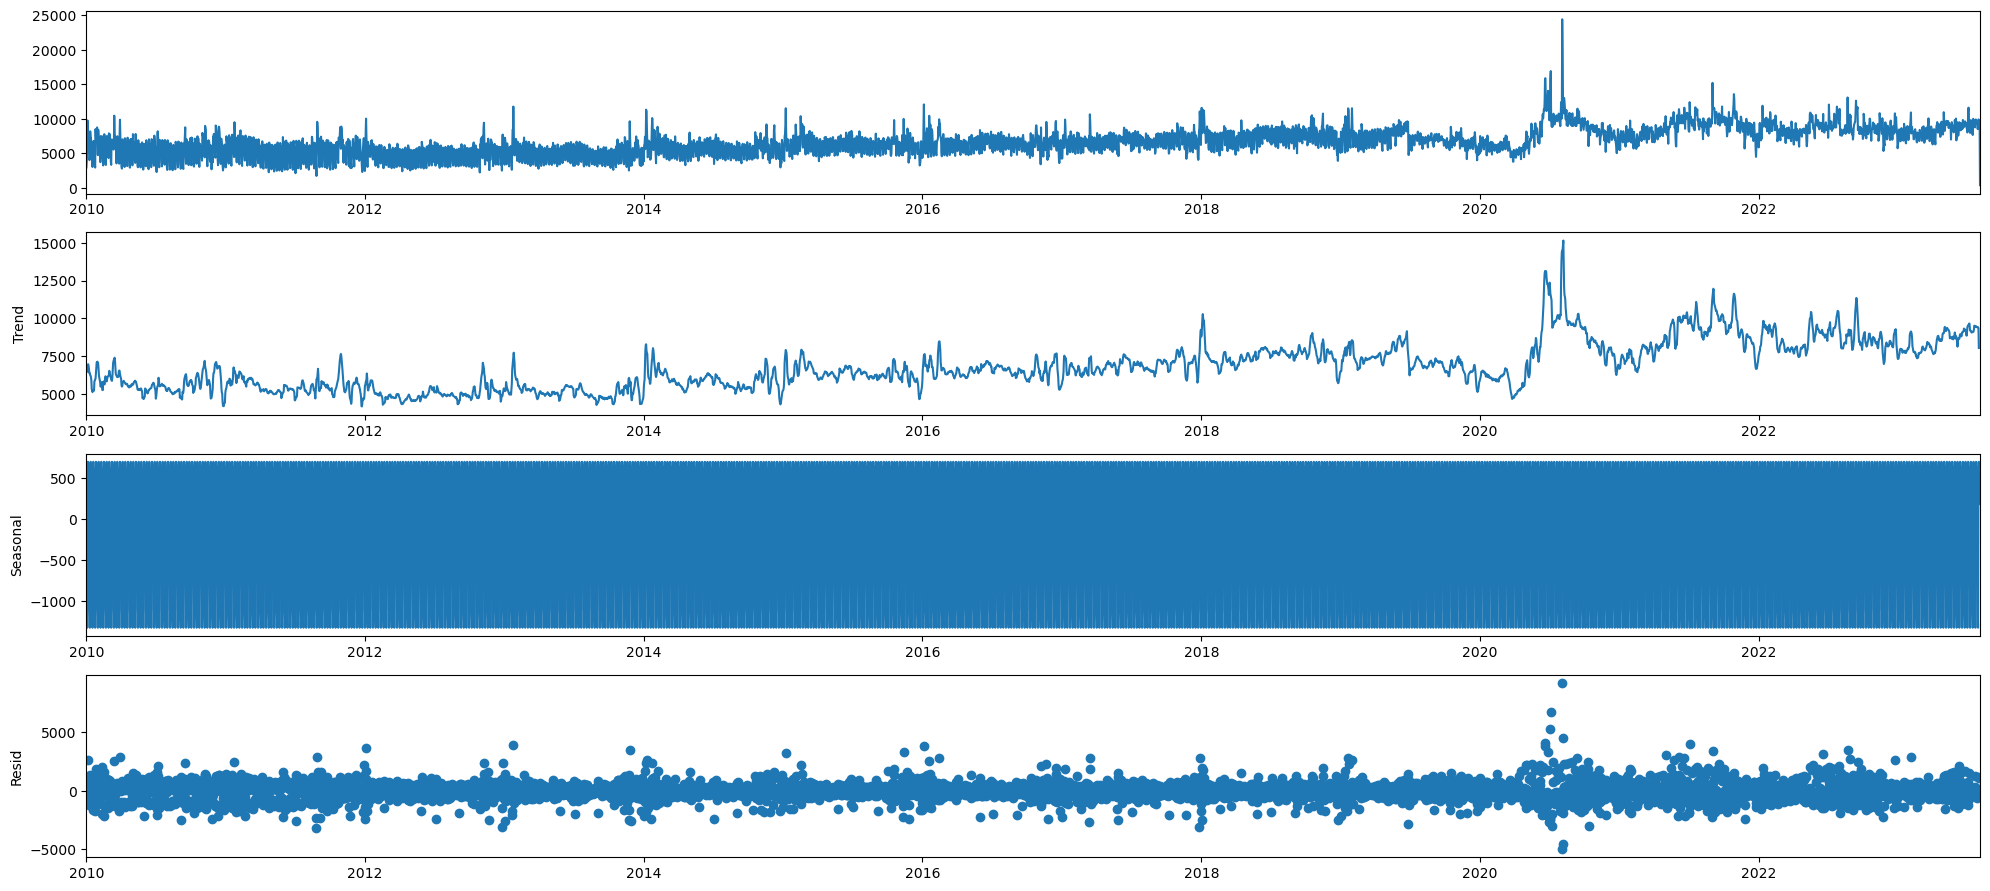

In [36]:
result = seasonal_decompose(single_date, model = 'additive')
plt.rcParams['figure.figsize'] = (20, 9)
result.plot();

In [44]:
ets = pd.DataFrame({'trend': result.trend, 
              'seasonality': result.seasonal, 
              'error': result.resid})

In [45]:
ets.reset_index(inplace = True)

In [46]:
ets

,Created Date,trend,seasonality,error
0,2010-01-01,NaN,182.697638,NaN
1,2010-01-02,NaN,-1096.197842,NaN
2,2010-01-03,NaN,-1320.055591,NaN
3,2010-01-04,6479.571429,634.158302,2649.270270
4,2010-01-05,6957.857143,694.951572,1082.191285
...,...,...,...,...
4959,2023-07-31,9356.714286,634.158302,-69.872587
4960,2023-08-01,8045.428571,694.951572,1072.619857
4961,2023-08-02,NaN,527.573748,NaN
4962,2023-08-03,NaN,376.872174,NaN


In [47]:
ets[ets['Created Date']=='2020-12-25']

,Created Date,trend,seasonality,error
4011,2020-12-25,6411.428571,182.697638,-1567.126209


#### Calculate the autocorrelation of the number of daily calls with the number of calls the day prior, ie lag of 1.  (Use the daily series).

In [48]:
from statsmodels.tsa.stattools import acf
acf(single_date)

array([1.        , 0.75051424, 0.5385677 , 0.48763193, 0.47912318,
       0.50367422, 0.65325166, 0.78735576, 0.64024251, 0.47810689,
       0.4412852 , 0.43245455, 0.45933263, 0.61601086, 0.75916101,
       0.61690178, 0.46145806, 0.4277244 , 0.42450554, 0.4555627 ,
       0.61056881, 0.74821479, 0.60717727, 0.4484158 , 0.41633872,
       0.41518982, 0.45040719, 0.59985602, 0.73376054, 0.59641813,
       0.44172261, 0.4143002 , 0.41500839, 0.44366085, 0.59565884,
       0.73652828, 0.59316864])

In [51]:
[(n,x ) for n, x in enumerate(acf(single_date))]

[(0, 1.0),
 (1, 0.7505142364756073),
 (2, 0.5385677005464163),
 (3, 0.4876319349471612),
 (4, 0.47912317586861014),
 (5, 0.5036742164042234),
 (6, 0.6532516645683314),
 (7, 0.7873557591053877),
 (8, 0.6402425082224174),
 (9, 0.4781068899314745),
 (10, 0.44128520422701517),
 (11, 0.43245454663032395),
 (12, 0.45933262752022097),
 (13, 0.6160108562208476),
 (14, 0.7591610121270015),
 (15, 0.6169017761087279),
 (16, 0.46145805728555667),
 (17, 0.4277243963001102),
 (18, 0.4245055433765635),
 (19, 0.45556269608625855),
 (20, 0.6105688068921138),
 (21, 0.7482147856274084),
 (22, 0.6071772694322987),
 (23, 0.44841580285332344),
 (24, 0.4163387168357927),
 (25, 0.4151898156499598),
 (26, 0.45040718958726733),
 (27, 0.5998560199396321),
 (28, 0.7337605423131681),
 (29, 0.5964181344488516),
 (30, 0.44172261087389936),
 (31, 0.41430019827396114),
 (32, 0.41500839499299474),
 (33, 0.443660849177503),
 (34, 0.5956588412234556),
 (35, 0.7365282791908934),
 (36, 0.5931686446827368)]

#### Forecast the daily series with a test set of 90 days using the Prophet library.  What is your RMSE on your test set?

In [52]:
single_date.shape

(4964,)

In [54]:
pip install prophet

Note: you may need to restart the kernel to use updated packages.Collecting prophet
     ---------------------------------------- 13.3/13.3 MB 8.0 MB/s eta 0:00:00
     ---------------------------------------- 1.0/1.0 MB 9.2 MB/s eta 0:00:00
     ---------------------------------------- 94.4/94.4 kB 1.8 MB/s eta 0:00:00



In [55]:
from prophet import Prophet

In [95]:
train_samples = int(single_date.shape[0] * 0.982)

train_set = single_date.iloc[:train_samples]
test_set = single_date.iloc[train_samples:]

print("Training set: ", train_set.shape[0])
print("Test set: ", test_set.shape[0])

Training set:  4874
Test set:  90


In [69]:
train_set.head()

Created Date
2010-01-01    2942
2010-01-02    3958
2010-01-03    5676
2010-01-04    9763
2010-01-05    8735
Freq: D, dtype: int64

In [70]:
train_set_prophet = train_set.reset_index()

In [71]:
train_set_prophet.columns = ['ds', 'y']
train_set_prophet.head()

,ds,y
0,2010-01-01,2942
1,2010-01-02,3958
2,2010-01-03,5676
3,2010-01-04,9763
4,2010-01-05,8735


In [72]:
model = Prophet()
model.fit(train_set_prophet)

17:27:10 - cmdstanpy - INFO - Chain [1] start processing
17:27:11 - cmdstanpy - INFO - Chain [1] done processing


In [74]:
future = model.make_future_dataframe(periods=15,freq = 'm')
future.tail()

,ds
4884,2024-03-31
4885,2024-04-30
4886,2024-05-31
4887,2024-06-30
4888,2024-07-31


In [75]:
future.shape

(4889, 1)

In [76]:
forecast = model.predict(future)

In [77]:
forecast.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'weekly', 'weekly_lower', 'weekly_upper', 'yearly', 'yearly_lower',
       'yearly_upper', 'multiplicative_terms', 'multiplicative_terms_lower',
       'multiplicative_terms_upper', 'yhat'],
      dtype='object')

In [78]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-01-01,5947.298680,4345.189419,7032.580179,5947.298680,5947.298680,-342.691881,-342.691881,-342.691881,183.220793,183.220793,183.220793,-525.912675,-525.912675,-525.912675,0.0,0.0,0.0,5604.606799
1,2010-01-02,5946.304865,2896.888700,5732.747218,5946.304865,5946.304865,-1584.577300,-1584.577300,-1584.577300,-1101.553317,-1101.553317,-1101.553317,-483.023983,-483.023983,-483.023983,0.0,0.0,0.0,4361.727564
2,2010-01-03,5945.311049,2768.543152,5640.029974,5945.311049,5945.311049,-1771.815317,-1771.815317,-1771.815317,-1337.411831,-1337.411831,-1337.411831,-434.403486,-434.403486,-434.403486,0.0,0.0,0.0,4173.495732
3,2010-01-04,5944.317234,4870.417739,7538.410896,5944.317234,5944.317234,259.988751,259.988751,259.988751,640.820144,640.820144,640.820144,-380.831393,-380.831393,-380.831393,0.0,0.0,0.0,6204.305985
4,2010-01-05,5943.323419,4942.249713,7736.452925,5943.323419,5943.323419,373.479456,373.479456,373.479456,696.668755,696.668755,696.668755,-323.189299,-323.189299,-323.189299,0.0,0.0,0.0,6316.802875


In [102]:
preds = pd.DataFrame({'Prediction': forecast.yhat[-90:]})
preds.index = pd.to_datetime(forecast.ds[-90:])
preds.index.names = ['Date']
preds

,Prediction
Date,
2023-02-21,9164.001313
2023-02-22,9013.027925
2023-02-23,8875.031033
2023-02-24,8684.691150
2023-02-25,7409.759477
...,...
2024-03-31,6815.419679
2024-04-30,9087.615065
2024-05-31,8818.569407


In [103]:
y_test = test_set 
y_pred = preds['Prediction']
pd.DataFrame({'y_test': y_test, 'y_pred' : y_pred, 'diff':y_test - y_pred})

,y_test,y_pred,diff
2023-02-21,NaN,9164.001313,NaN
2023-02-22,NaN,9013.027925,NaN
2023-02-23,NaN,8875.031033,NaN
2023-02-24,NaN,8684.691150,NaN
2023-02-25,NaN,7409.759477,NaN
...,...,...,...
2024-03-31,NaN,6815.419679,NaN
2024-04-30,NaN,9087.615065,NaN
2024-05-31,NaN,8818.569407,NaN
2024-06-30,NaN,7649.427549,NaN


In [104]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
print('MSE = ', mean_squared_error(y_test,y_pred))
print('RMSE = ', np.sqrt(mean_squared_error(y_test,y_pred)))
print('MAE = ', mean_absolute_error(y_test,y_pred))

MSE =  2753618.520807055
RMSE =  1659.4030615878273
MAE =  1173.643060205517


|Created By|Contact|
|----------|-------|
|Sai Deepak Reddy Kothi|deepak.reddy0106@gmail.com|